In [1]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
import urllib.request
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/pytorch-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/IMDB%20Dataset.csv", filename="IMDB Dataset.csv")

('IMDB Dataset.csv', <http.client.HTTPMessage at 0x78cb7eac7b20>)

In [4]:
#데이터 확인
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
print(df.groupby('sentiment').size().reset_index(name='count'))

  sentiment  count
0  negative  25000
1  positive  25000


In [10]:
#데이터 처리( positive, negative = 1, 0)
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1,0])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
#데이터 전처리

# X y 정의

X_data = df['review']
y_data = df['sentiment']

print('영화 리뷰의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

영화 리뷰의 개수: 50000
레이블의 개수: 50000


In [13]:
#훈련데이터와 테스트테이서 분리(5:5) / 훈련데이터 : 검정데이터 = 8:2
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.5, random_state=0, stratify=y_data)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0, stratify=y_train)

print('-----------훈련 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

print('-----------검증 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_valid.value_counts()[0]/len(y_valid) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_valid.value_counts()[1]/len(y_valid) * 100,3)}%')

print('-----------테스트 데이터의 비율-----------')
print(f'부정 리뷰 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'긍정 리뷰 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

-----------훈련 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
-----------검증 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%
-----------테스트 데이터의 비율-----------
부정 리뷰 = 50.0%
긍정 리뷰 = 50.0%


In [14]:
#토큰화
def tokenize(sentences):
    tokenized_sentences = []
    for sent in tqdm(sentences):
        tokenized_sent = word_tokenize(sent)
        tokenized_sent = [word.lower() for word in tokenized_sent]
        tokenized_sentences.append(tokenized_sent)
    return tokenized_sentences

tokenized_X_train = tokenize(X_train)
tokenized_X_valid = tokenize(X_valid)
tokenized_X_test = tokenize(X_test)

100%|██████████| 25000/25000 [00:42<00:00, 592.95it/s]


In [15]:
for sent in tokenized_X_train[:2]:
    print(sent)

['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!', 'i', 'love',

In [16]:
#Vocab 만들기
word_list = []
for sent in tokenized_X_train:
    for word in sent:
        word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 100586


In [17]:
#빈도수 높은 10개
vocab = sorted(word_counts, key = word_counts.get, reverse = True)
print('등장 빈도수 상위 10개 단어')
print(vocab[:10])

등장 빈도수 상위 10개 단어
['the', ',', '.', 'a', 'and', 'of', 'to', 'is', '/', '>']


In [18]:
#빈도수 3 미만

threshold = 3
total_cnt = len(word_counts)
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수 카운트
total_freq = 0 #훈련 데이터의 전체 단어 빈도수 총합
rare_freq = 0 #등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for key, value in word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print(f"등장 빈도가 {threshold -1}번 이하인 희귀 단어의 수 : {rare_cnt}")
print('단어 집합에서 희귀 단어의 비율:', (rare_cnt/total_cnt)*100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율:',(rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 100586
등장 빈도가 2번 이하인 희귀 단어의 수 : 61877
단어 집합에서 희귀 단어의 비율: 61.51651323245779
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3294254426463437


In [19]:
#등장 빈도수가 2이하인 단어 제거
vocab_size = total_cnt - rare_cnt
vocab = vocab[:vocab_size]
print('단어 집합의 크기 :',len(vocab))

단어 집합의 크기 : 38709


In [20]:
#패딩토큰:0, 문제 발생 시에 모르는 단어 : 1
word_to_index = {}
word_to_index['<PAD>'] = 0
word_to_index['<UNK>'] = 1

for index, word in enumerate(vocab):
    word_to_index[word] = index +2

vocab_size = len(word_to_index)
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 38711


In [21]:
#정수 인코딩

#인코딩 함수
def texts_to_sequences(tokenized_X_data, word_to_index):
    encoded_X_data = []
    for sent in tokenized_X_data:
        index_sequences = []
        for word in sent:
            try:
                index_sequences.append(word_to_index[word])
            except KeyError:
                index_sequences.append(word_to_index['<UNK>'])
        encoded_X_data.append(index_sequences)
    return encoded_X_data

encoded_X_train = texts_to_sequences(tokenized_X_train, word_to_index)
encoded_X_valid = texts_to_sequences(tokenized_X_valid, word_to_index)
encoded_X_test = texts_to_sequences(tokenized_X_test, word_to_index)


In [22]:
for sent in encoded_X_train[:2]:
    print(sent)

[38, 29, 140, 3, 52, 54, 29, 38, 3, 5, 3406, 47, 19, 95, 22, 29, 161, 4059, 6, 1741, 3, 47, 29, 293, 39, 469, 218, 3, 6, 47, 29, 134, 71, 532, 61, 59, 25184, 130, 214, 44, 249, 2, 189, 114, 58, 29, 41, 12, 13, 10, 11, 12, 13, 10, 11, 384, 3, 384, 253, 26, 4, 57, 29, 38, 5, 2280, 1587, 23, 1477, 3, 17, 9, 5775, 8, 111, 29, 1440, 71, 532, 141, 677, 4, 16, 343, 8, 126, 17, 24, 43, 2, 75, 63, 16, 20, 5, 137, 538, 3, 6, 16, 172, 18, 164, 3, 42, 677, 12075, 3, 16, 134, 14, 21, 89, 21, 16, 83, 110, 4, 16, 94, 130, 1124, 30, 5, 494, 121, 110, 3, 6, 16, 145, 54, 31, 120, 16, 73, 41, 16, 134, 43, 301, 7, 2, 1477, 4, 2, 425, 204, 66, 168, 6, 3964, 3, 50, 5, 1961, 3, 25, 19699, 253, 4, 16, 54, 134, 580, 3, 6, 105, 42, 2, 152, 36, 544, 18, 36, 55, 5, 253, 42, 247, 4, 933, 3, 421, 3, 25, 40, 227, 407, 18, 17, 9, 965, 8, 39, 5, 253, 26, 3, 6, 14, 17326, 18, 233, 872, 4, 8000, 55, 53, 2, 416, 4967, 7, 33, 1, 32, 6, 2669, 9, 2, 416, 1, 2144, 8, 2, 208, 3, 8988, 13008, 12, 13, 10, 11, 12, 13, 10, 11, 2,

In [23]:
#역으로 복원해보기
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value] = key

decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]
print('기존의 첫번째 샘플 :', tokenized_X_train[0])
print('복원된 첫번째 샘플 :', decoded_sample)

기존의 첫번째 샘플 : ['have', 'you', 'ever', ',', 'or', 'do', 'you', 'have', ',', 'a', 'pet', 'who', "'s", 'been', 'with', 'you', 'through', 'thick', 'and', 'thin', ',', 'who', 'you', "'d", 'be', 'lost', 'without', ',', 'and', 'who', 'you', 'love', 'no', 'matter', 'what', '?', 'betcha', 'never', 'thought', 'they', 'feel', 'the', 'same', 'way', 'about', 'you', '!', '<', 'br', '/', '>', '<', 'br', '/', '>', 'wonderful', ',', 'wonderful', 'family', 'film', '.', 'if', 'you', 'have', 'a', 'soft', 'spot', 'for', 'animals', ',', 'this', 'is', 'guaranteed', 'to', 'make', 'you', 'cry', 'no', 'matter', 'your', 'age', '.', 'i', 'used', 'to', 'watch', 'this', 'movie', 'all', 'the', 'time', 'when', 'i', 'was', 'a', 'little', 'kid', ',', 'and', 'i', 'find', 'that', 'now', ',', 'at', 'age', 'sixteen', ',', 'i', 'love', 'it', 'as', 'much', 'as', 'i', 'did', 'then', '.', 'i', 'could', 'never', 'decide', 'on', 'a', 'favorite', 'character', 'then', ',', 'and', 'i', 'still', 'do', "n't", 'think', 'i', 'can', '!',

최대 : 2818
평균 : 279.1958


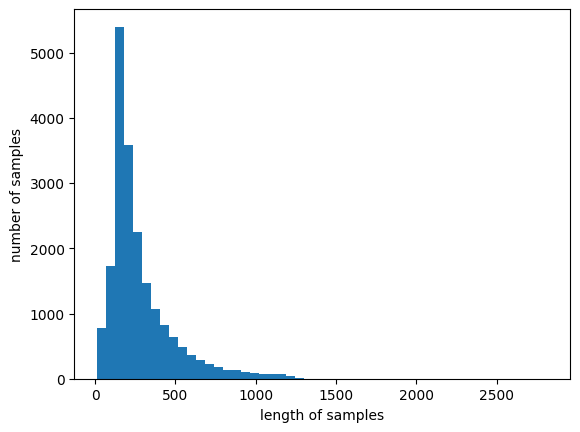

In [25]:
#패딩

#최대 / 평균 / 분포 확인
print('최대 :',max(len(review) for review in encoded_X_train))
print('평균 :', sum(map(len, encoded_X_train))/len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
#패딩 길이 확인하기
#최대길이인 2818로 패딩하면 크기가 너무 크다

def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence)<=max_len):
            count = count + 1
    print(f'전체 샘플중 길이가 {max_len} 이하인 샘플의 비율 : {(count / len(nested_list))*100}')


In [27]:
max_len = 500
below_threshold_len(max_len, encoded_X_train)

전체 샘플중 길이가 500 이하인 샘플의 비율 : 87.795


In [28]:
#길이 500으로 패딩

#패딩 함수 정의
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype = int)
    for index, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features

padded_X_train = pad_sequences(encoded_X_train, max_len=max_len)
padded_X_valid = pad_sequences(encoded_X_valid, max_len=max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len=max_len)

print('훈련데이터 :', padded_X_train.shape)
print('검증 데이터 :', padded_X_valid.shape)
print('테스트 데이터 :', padded_X_test.shape)

훈련데이터 : (20000, 500)
검증 데이터 : (5000, 500)
테스트 데이터 : (25000, 500)


In [29]:
#GRU모델링---------------

#import
import torch
import torch.nn as nn
import torch.nn.functional as F

#런타임 유형 확인
USE_CUDA = torch.cuda.is_available()
device = torch.device('cuda' if USE_CUDA else 'cpu')
print('cpu와 cuda 중 다음 기기로 학습함 :', device)

cpu와 cuda 중 다음 기기로 학습함 : cuda


In [30]:
train_label_tensor = torch.tensor(np.array(y_train))
valid_label_tensor = torch.tensor(np.array(y_valid))
test_label_tensor = torch.tensor(np.array(y_test))
print(train_label_tensor[:5])

tensor([1, 1, 0, 0, 0])


In [32]:
#GRU 모델을 클래스로 구현

#- 단어 벡터의 차원 = 100
#- 문장 길이 = 500
#- 배치 크기 = 32
#- 데이터 개수 = 2만
#- GRU의 은닉층의 크기 = 128
#- 분류하고자 하는 카테고리 개수 = 2개

#(32, 500) => 입력 데이터의 형태 => 임베딩 층 통과 후 => (32, 500, 100)
# => GRU 통과 후 => (32, 128) => Softmax 출력층 통과 후 => (32, 2)

class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first = True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x :(batch_size, seq_length) == (32, 500)
        embedded = self.embedding(x)
        # (batch_size, seq_length, embedding_dim) == (32, 500, 100)
        # == (데이터의 개수, 문장 길이, 단어 벡터의 차원)
        gru_out, hidden = self.gru(embedded)
        last_hidden = hidden.squeeze(0)
        logits = self.fc(last_hidden)
        return logits

In [33]:
# 훈련, 검증, 테스트 데이터를 텐서로 변환 / 데이터 로더로 변환
encoded_train = torch.tensor(padded_X_train).to(torch.int64)
train_dataset = torch.utils.data.TensorDataset(encoded_train, train_label_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)

encoded_test = torch.tensor(padded_X_test).to(torch.int64)
test_dataset = torch.utils.data.TensorDataset(encoded_test, test_label_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, shuffle=True, batch_size=1)

encoded_valid = torch.tensor(padded_X_valid).to(torch.int64)
valid_dataset = torch.utils.data.TensorDataset(encoded_valid, valid_label_tensor)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=1)


In [34]:
total_batch = len(train_dataloader)
print(total_batch)

625


In [35]:
#모델 객체 선언
embedding_dim = 100
hidden_dim = 128
output_dim =2
learning_rate = 0.01
num_epochs = 10

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model.to(device)

TextClassifier(
  (embedding): Embedding(38711, 100)
  (gru): GRU(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [37]:
#평가 코드

#정확도 측정 함수
def calculate_accuracy(logits, labels):
    predicted = torch.argmax(logits, dim=1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy

In [39]:
#모델을 평가
def evaluate(model, valid_dataloader, criterion, device):
    val_loss = 0
    val_correct = 0
    val_total = 0

    model.eval()
    with torch.no_grad():
        for batch_X, batch_y in valid_dataloader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            #모델의 예측값
            logits = model(batch_X)

            #손실
            loss =criterion(logits, batch_y)

            #정확도와 손실을 계산
            val_loss += loss.item()
            val_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
            val_total += batch_y.size(0)

    val_accuracy = val_correct / val_total
    val_loss /= len(valid_dataloader)

    return val_loss, val_accuracy


In [40]:
#학습
num_epochs = 5

#Training loop
best_val_loss =float('inf')

#Training loop
for epoch in range(num_epochs):
    #Training
    train_loss = 0
    train_correct = 0
    train_total = 0
    model.train()
    for batch_X, batch_y in train_dataloader:
        #Forward pass
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        #batch_X.shape == (batch_size, max_len)
        logits = model(batch_X)

        #Compute loss
        loss = criterion(logits, batch_y)

        #Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Calculate training accuracy and loss
        train_loss += loss.item()
        train_correct += calculate_accuracy(logits, batch_y) * batch_y.size(0)
        train_total += batch_y.size(0)

    train_accuracy = train_correct / train_total
    train_loss /= len(train_dataloader)

    #Validation
    val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Train Loss: {train_loss: .4f}, Train Accuracy: {train_accuracy: .4f}')
    print(f'Validation Loss: {val_loss: .4f}, Validation Accuracy: {val_accuracy: .4f}')

    # 검증 손실이 최소일 때 체크포인트 저장
    if val_loss < best_val_loss:
        print(f"Validation loss imporved from {best_val_loss: .4f} to {val_loss: .4f}. 체크포인트를 저장합니다")
        best_val_loss =val_loss
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

Epoch 1/5:
Train Loss:  0.6979, Train Accuracy:  0.5088
Validation Loss:  0.6941, Validation Accuracy:  0.5006
Validation loss imporved from  inf to  0.6941. 체크포인트를 저장합니다
Epoch 2/5:
Train Loss:  0.6906, Train Accuracy:  0.5188
Validation Loss:  0.6909, Validation Accuracy:  0.5128
Validation loss imporved from  0.6941 to  0.6909. 체크포인트를 저장합니다
Epoch 3/5:
Train Loss:  0.6785, Train Accuracy:  0.5384
Validation Loss:  0.6789, Validation Accuracy:  0.5230
Validation loss imporved from  0.6909 to  0.6789. 체크포인트를 저장합니다
Epoch 4/5:
Train Loss:  0.5138, Train Accuracy:  0.7490
Validation Loss:  0.3702, Validation Accuracy:  0.8516
Validation loss imporved from  0.6789 to  0.3702. 체크포인트를 저장합니다
Epoch 5/5:
Train Loss:  0.2690, Train Accuracy:  0.8945
Validation Loss:  0.3063, Validation Accuracy:  0.8824
Validation loss imporved from  0.3702 to  0.3063. 체크포인트를 저장합니다


In [43]:
#모델 로드 및 평가

#모델 로드
model.load_state_dict(torch.load('best_model_checkpoint.pth'))

#모델을 device에 올립니다
model.to(device)

#검증 데이터에 대한 정확도와 손실 계산
val_loss, val_accuracy = evaluate(model, valid_dataloader, criterion, device)

print(f'Best model validation loss: {val_loss: .4f}')
print(f'Best model validation accuracy: {val_accuracy: .4f}')

Best model validation loss:  0.3063
Best model validation accuracy:  0.8824


In [44]:
#테스트 데이터에 대한 정확도와 손실 계산
test_loss, test_accuracy = evaluate(model, test_dataloader, criterion, device)

print(f'Best model test loss: {test_loss: .4f}')
print(f'Best model tset accuracy: {test_accuracy: .4f}')

Best model test loss:  0.3308
Best model tset accuracy:  0.8682


In [45]:
#모델 테스트
index_to_tag = {0: '부정', 1: '긍정'}

def predict(text, model, word_to_index, index_to_tag):
    #모델 평가 모드
    model.eval()

    tokens = word_tokenize(text)
    token_indices = [word_to_index.get(token.lower(), 1) for token in tokens]

    #리스트를 텐서로 변경
    input_tensor = torch.tensor([token_indices], dtype = torch.long).to(device)

    #모델의 예측
    with torch.no_grad():
        logits = model(input_tensor)

    #레이블 인덱스 예측
    _, predicted_index = torch.max(logits, dim=1)

    #인덱스와 매칭되는 카테고리 문자열로 변경
    predicted_tag = index_to_tag[predicted_index.item()]

    return predicted_tag

In [48]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

predict(test_input, model, word_to_index, index_to_tag)

'긍정'

In [49]:
test_input = 'this movie was bad. it is boring.'

predict(test_input, model, word_to_index, index_to_tag)

'부정'

In [47]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

predict(test_input, model, word_to_index, index_to_tag)


'긍정'